In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
cab_df = pd.read_csv('/content/Cab_Data.csv')
cab_df.head(3)
cab_df.info()
cab_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [ ]:
a = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')
cab_df.describe()

Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000

In [ ]:
cab_df['Company'].unique()
cab_df['City'].unique()
city_df = pd.read_csv('/content/City.csv')
city_df.head(3)

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132

In [ ]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [ ]:
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [ ]:
city_df.describe()

Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000

In [ ]:
transaction_id_df = pd.read_csv('/content/Transaction_ID.csv', parse_dates=True)
print(transaction_id_df.head())
print(transaction_id_df.info())
print(transaction_id_df.describe(include='all'))


   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
        Transaction ID    Customer ID Payment_Mode
count     4.400980e+05  440098.000000       440098
unique             NaN            NaN            2
top                NaN            NaN         Card
freq               NaN            NaN       263991
mean      1.022006e+07   23619.513120          NaN
std       1.270455e+05   21195.549816  

In [ ]:
customer_id_df = pd.read_csv('/content/Customer_ID.csv')
print(customer_id_df.head())
print(customer_id_df.info())
print(customer_id_df.describe(include='all'))

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
         Customer ID Gender           Age  Income (USD/Month)
count   49171.000000  49171  49171.000000        49171.000000
unique           NaN      2           NaN                 NaN
top              NaN   Male           NaN                 NaN
freq             Na

In [ ]:
df = pd.merge(cab_df, transaction_id_df, on='Transaction ID')
df = pd.merge(df, customer_id_df, on='Customer ID')
df = pd.merge(df, city_df, on='City')
print(df.head(2))

   Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-07    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-20  Yellow Cab  ATLANTA GA         26.19   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   

   Income (USD/Month)  Population    Users  
0               10813    814885.0  24701.0  
1               10813    814885.0  24701.0  


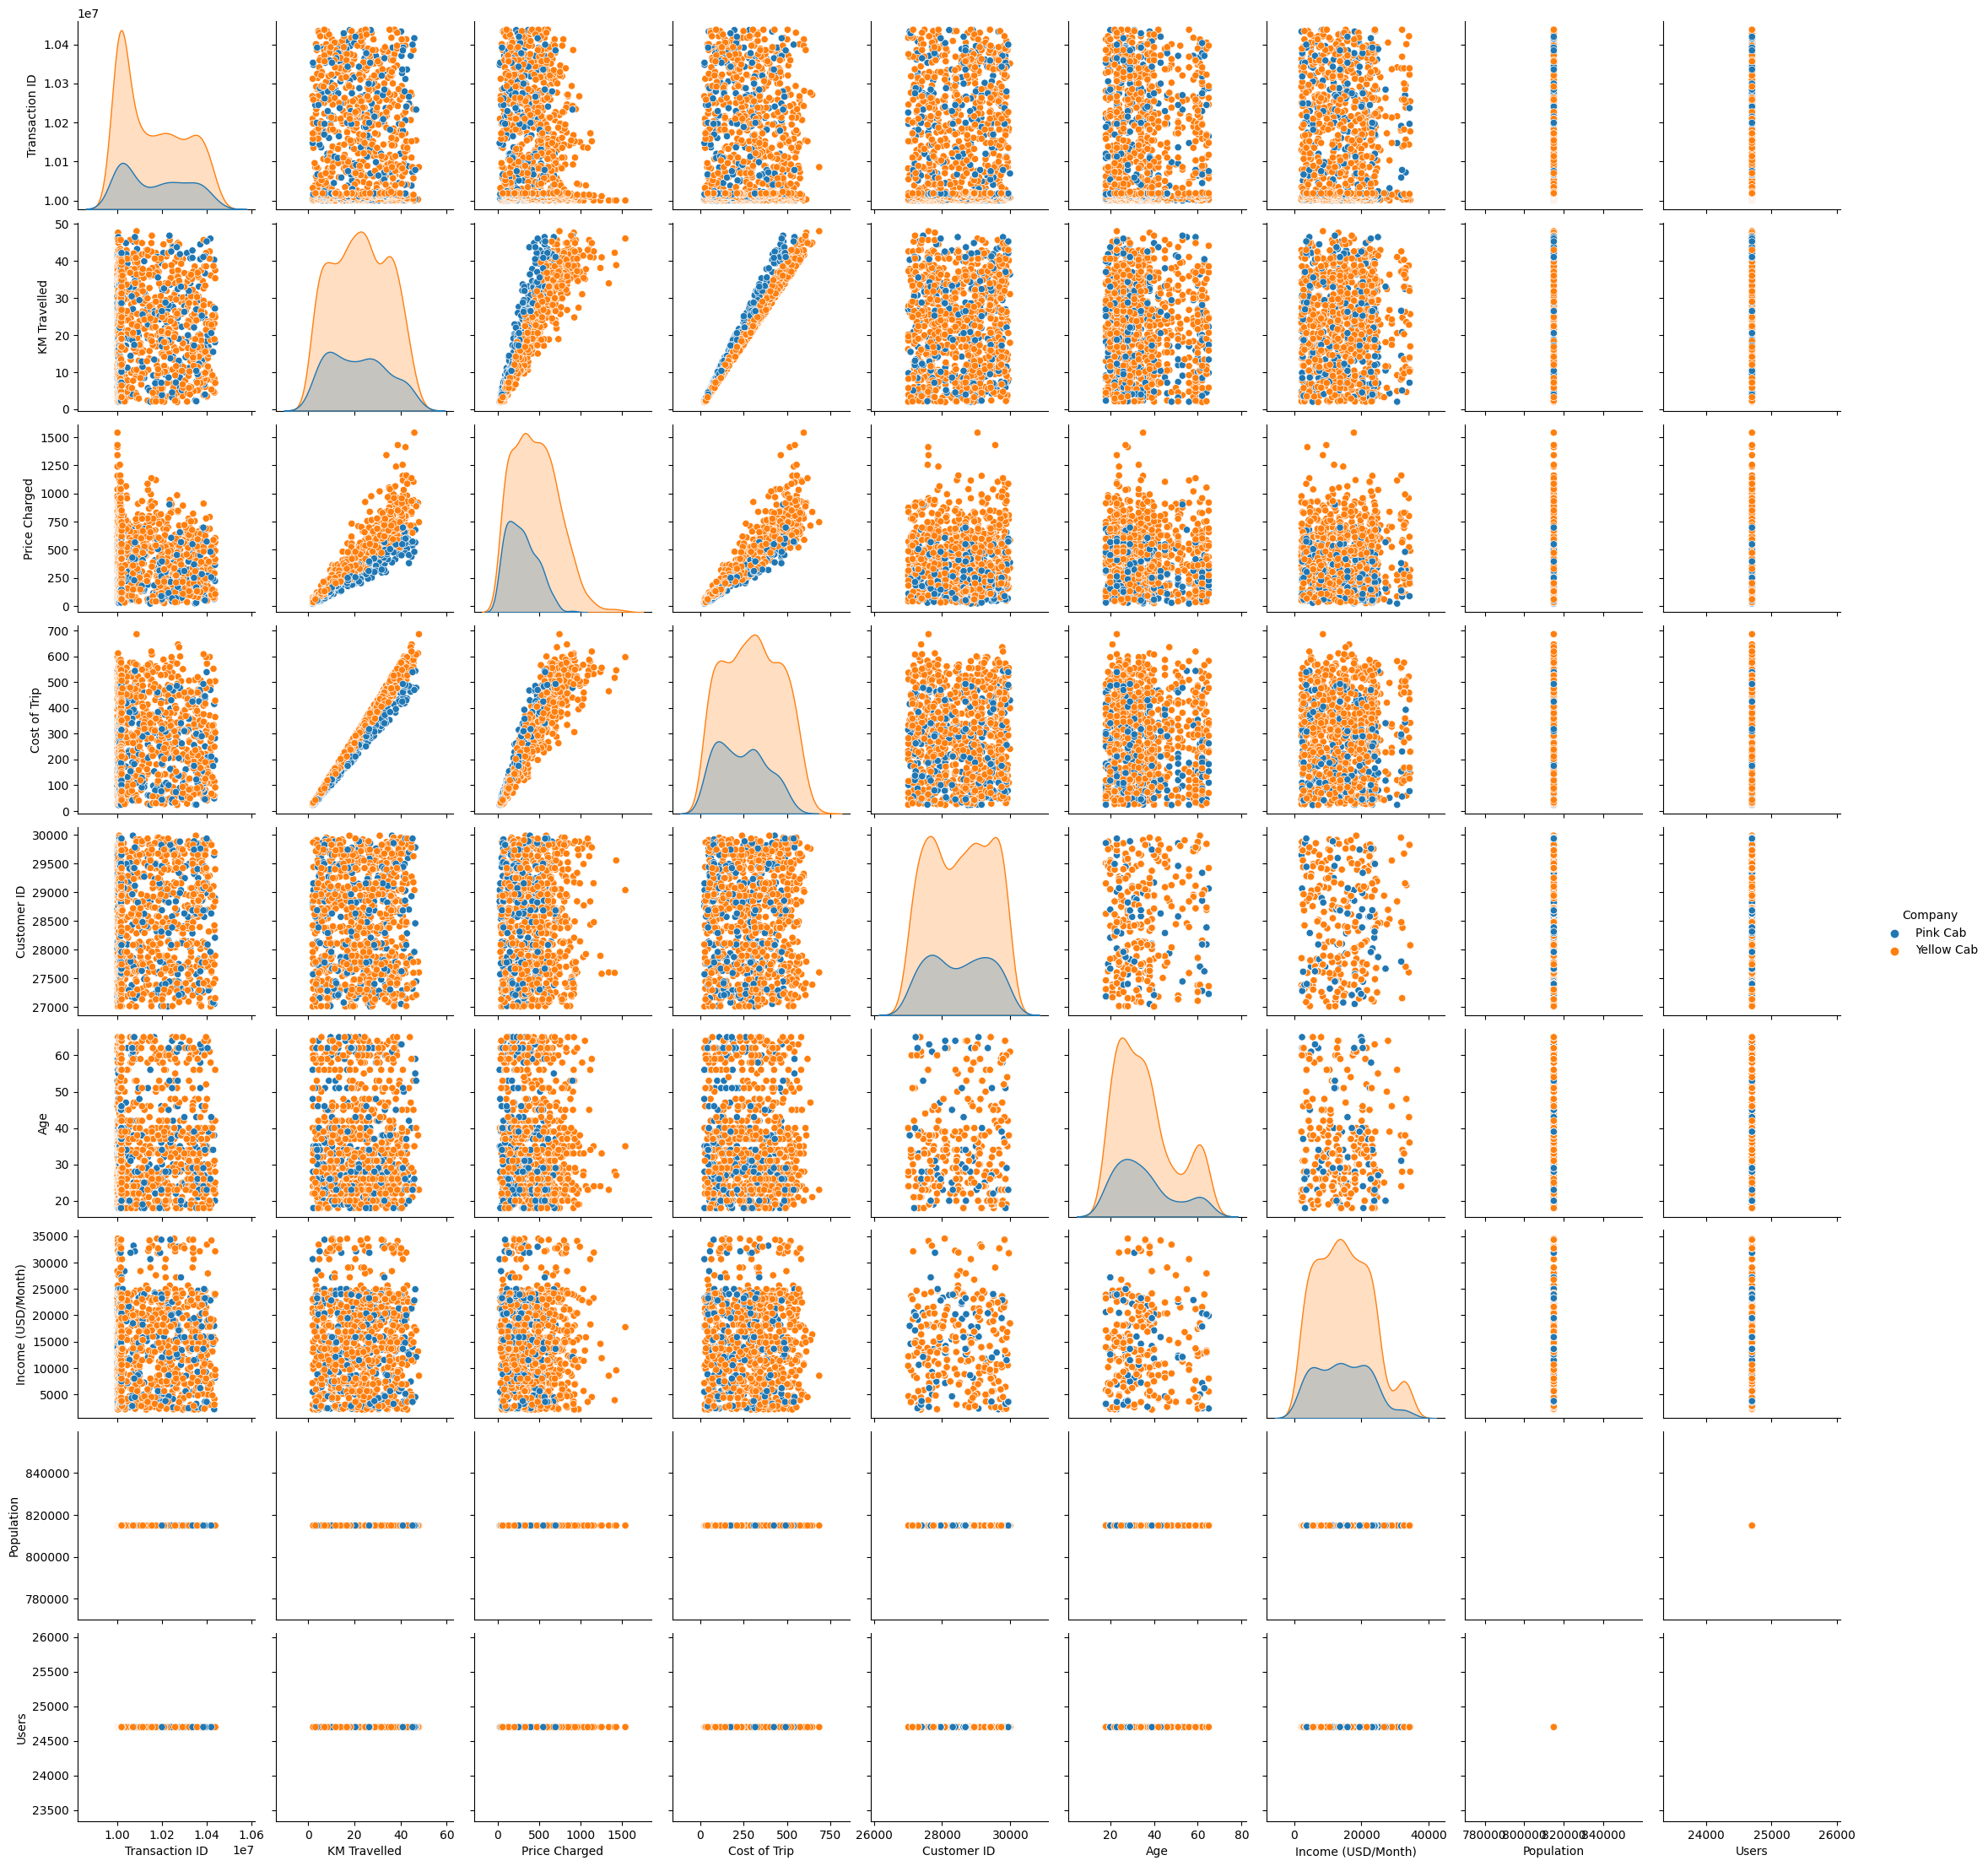

In [ ]:
sns.pairplot(df.head(1000), hue='Company')

In [ ]:
data_corr = df.corr()
print(data_corr)

                    Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   

                    Customer ID       Age  Income (USD/Month)  Population  \
Transaction ID        -0.016912 -0.001267           -0.001570    0.023868   
KM Travelled           0.000389 -0.

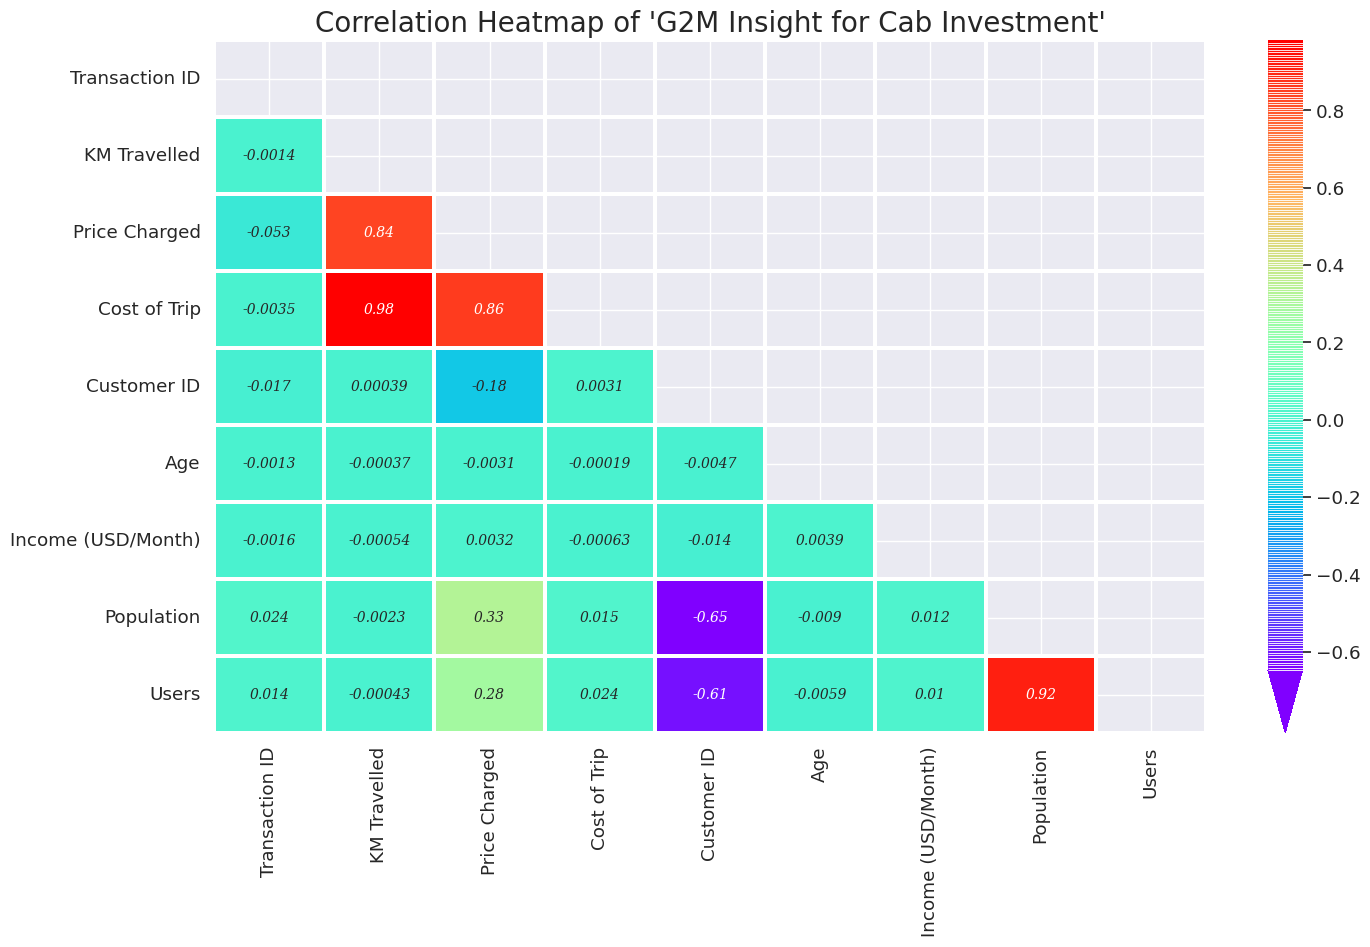

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size
plt.figure(figsize=(16, 9))

# Customize the annot
annot_kws = {
    'fontsize': 10,
    'fontstyle': 'italic',
    'fontfamily': 'serif',
    'alpha': 1
}

# Customize the cbar
cbar_kws = {
    "shrink": 1,
    "extend": "min",
    "extendfrac": 0.1,
    "drawedges": True
}

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask=np.triu(data_corr), cmap='rainbow',
                 annot=True, linewidth=1.5, annot_kws=annot_kws, cbar_kws=cbar_kws)

# Set the title etc
ax.set_title("Correlation Heatmap of 'G2M Insight for Cab Investment'", fontsize=20)

# Set the size of text
sns.set(font_scale=1.2)


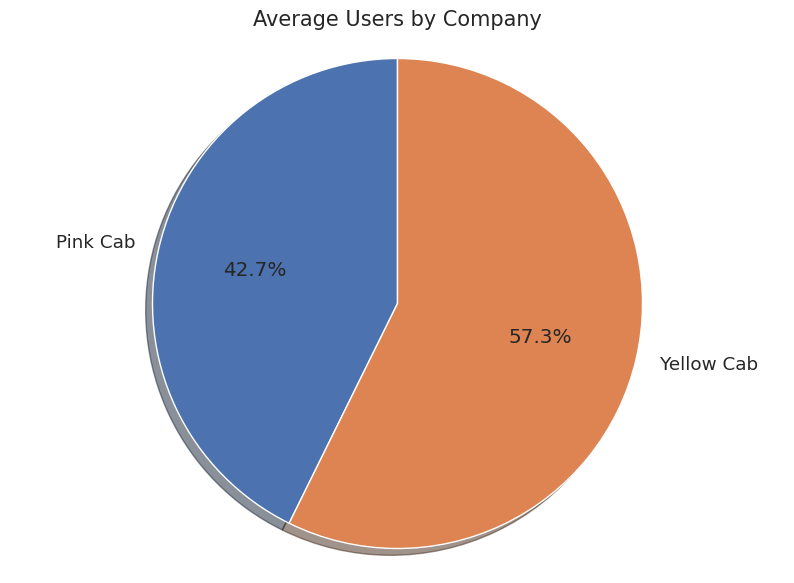

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by company and calculate mean users
avg_user = df.groupby('Company')['Users'].mean()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(avg_user, labels=avg_user.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

# Set the title and show the chart
plt.title('Average Users by Company', fontsize=15)
plt.show()


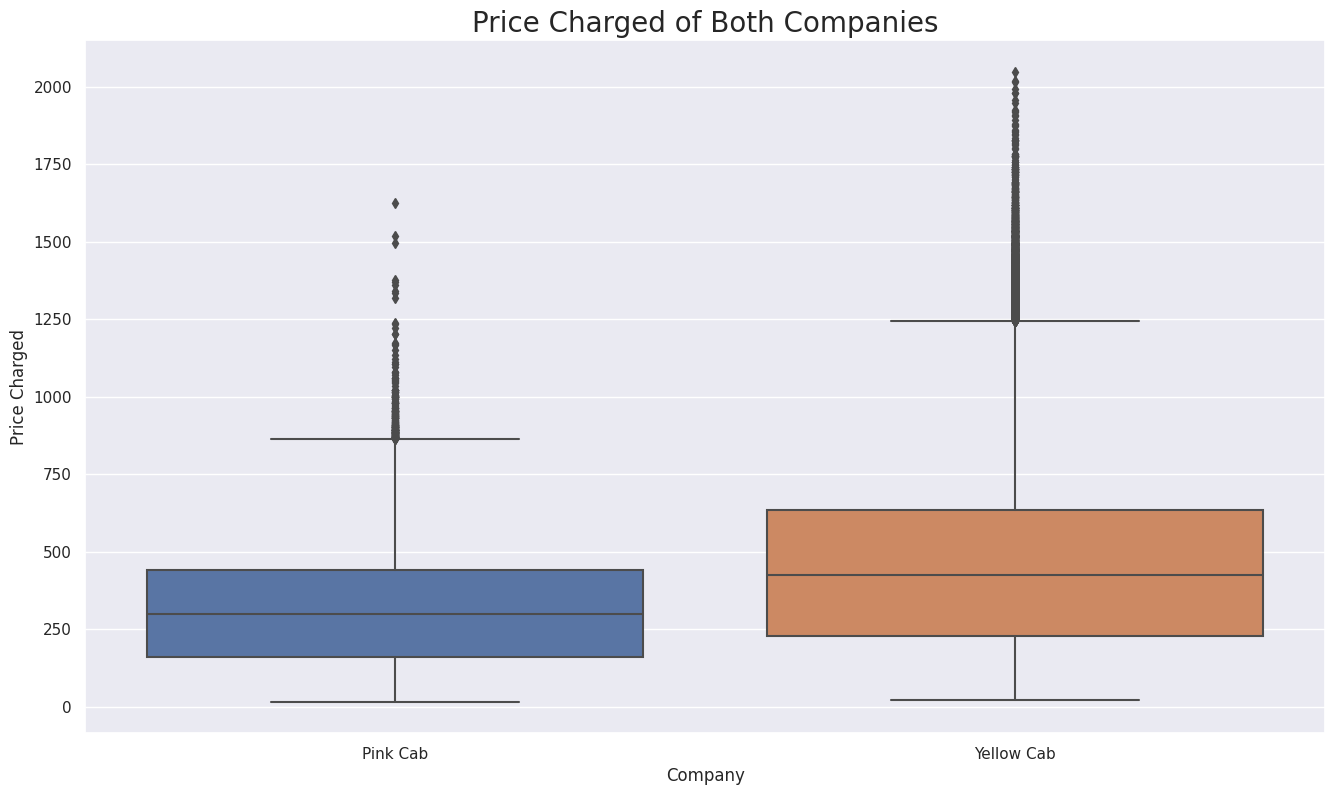

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 9))
sns.boxplot(x='Company', y='Price Charged', data=df)
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

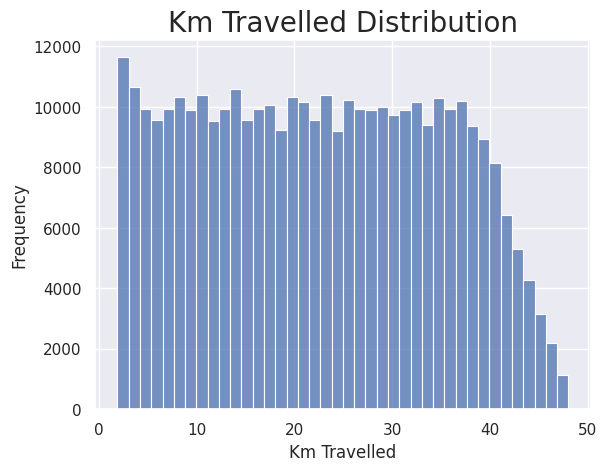

In [ ]:
sns.histplot(df['KM Travelled'], bins=40, kde=False)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()


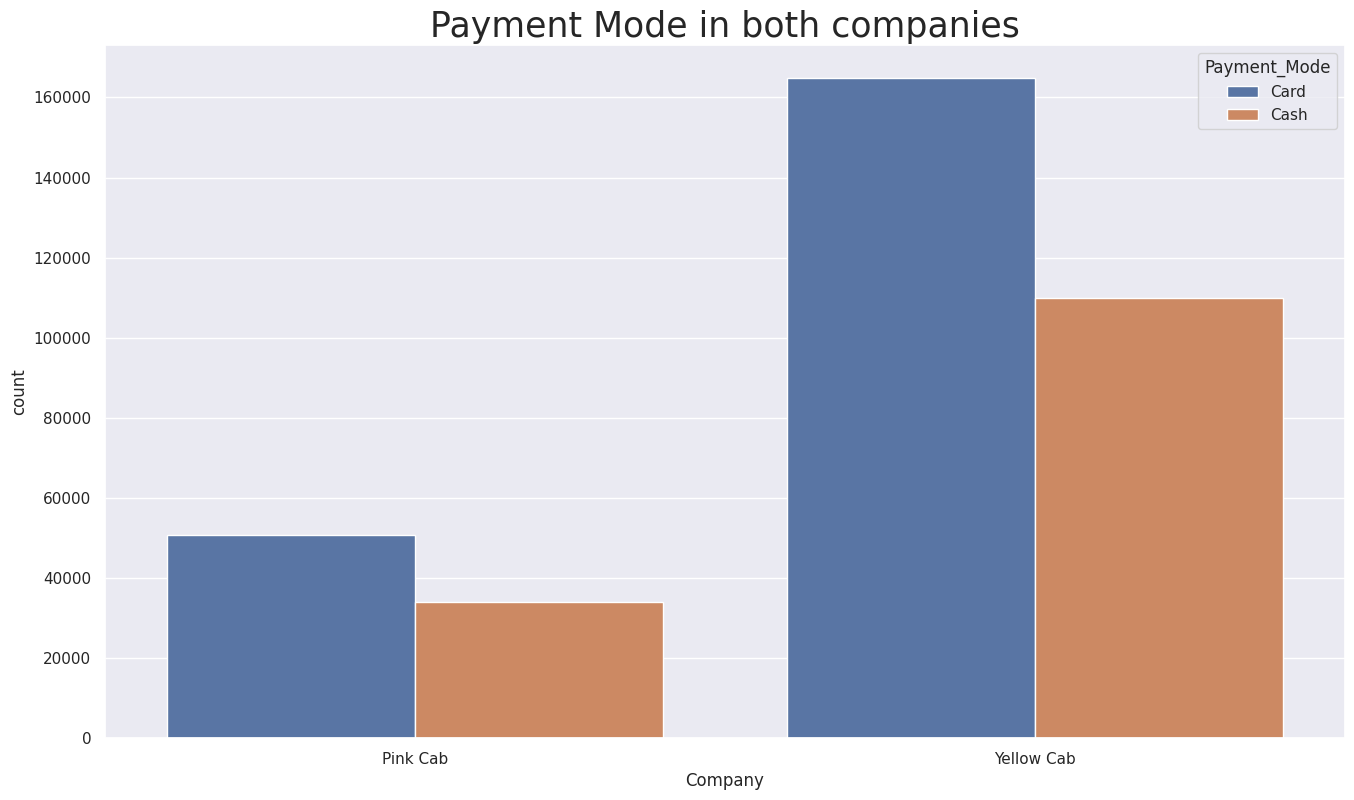

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()


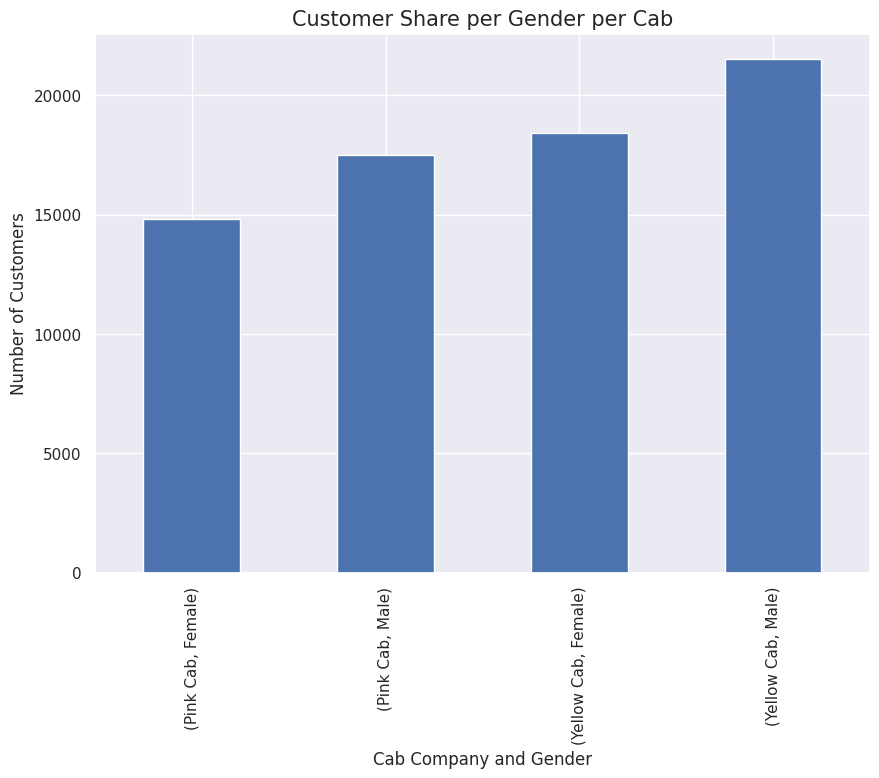

In [ ]:
import matplotlib.pyplot as plt

# group by company and gender, count unique customer IDs
gender_cab = df.groupby(['Company', 'Gender'])['Customer ID'].nunique()

# plot the results in a bar chart
fig, ax = plt.subplots(figsize=(10, 7))
gender_cab.plot(kind='bar', ax=ax)
ax.set_title('Customer Share per Gender per Cab', fontsize=15)
ax.set_xlabel('Cab Company and Gender')
ax.set_ylabel('Number of Customers')
plt.show()


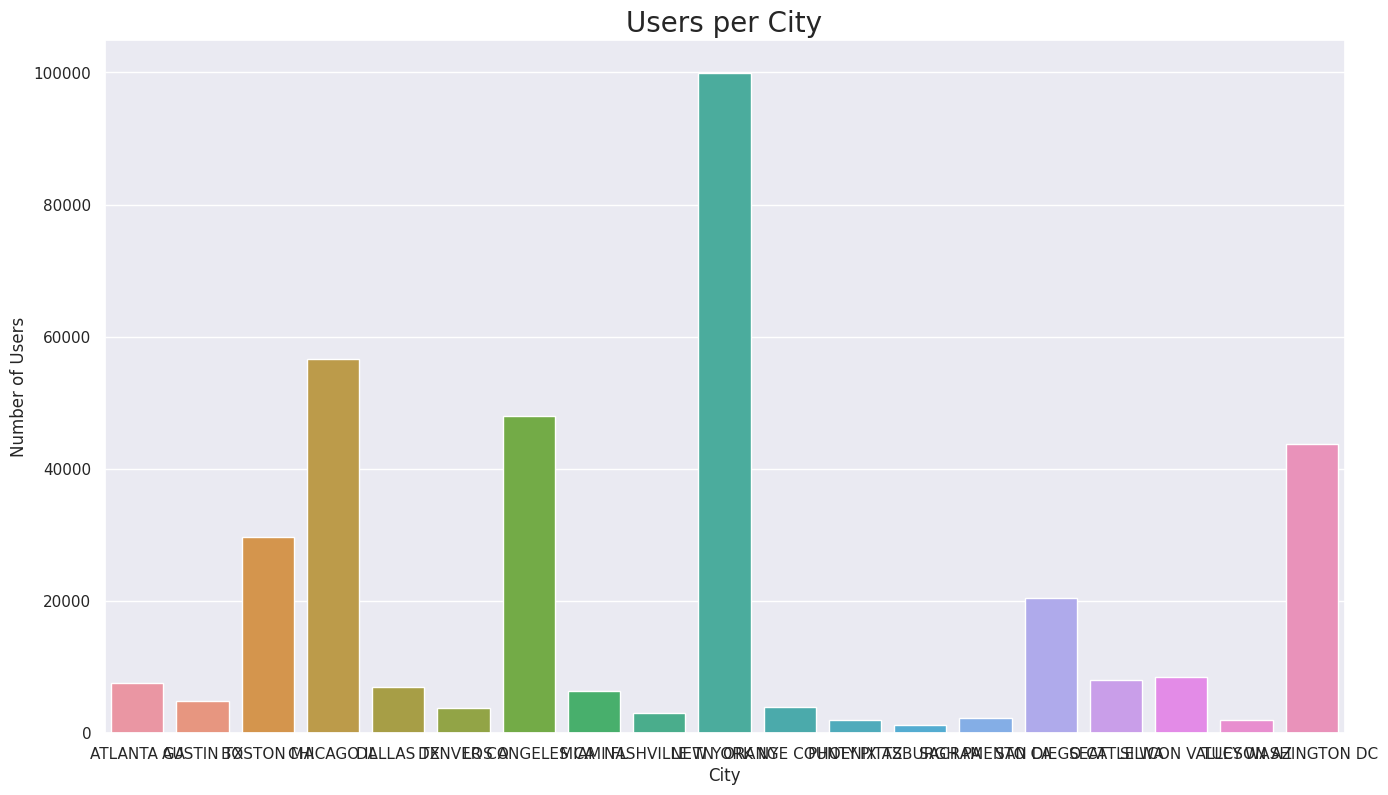

In [ ]:
import seaborn as sns

city_users = df.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.figure(figsize=(16, 9))
sns.barplot(x=labs, y=vals)
plt.title('Users per City', fontsize=20)
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.show()


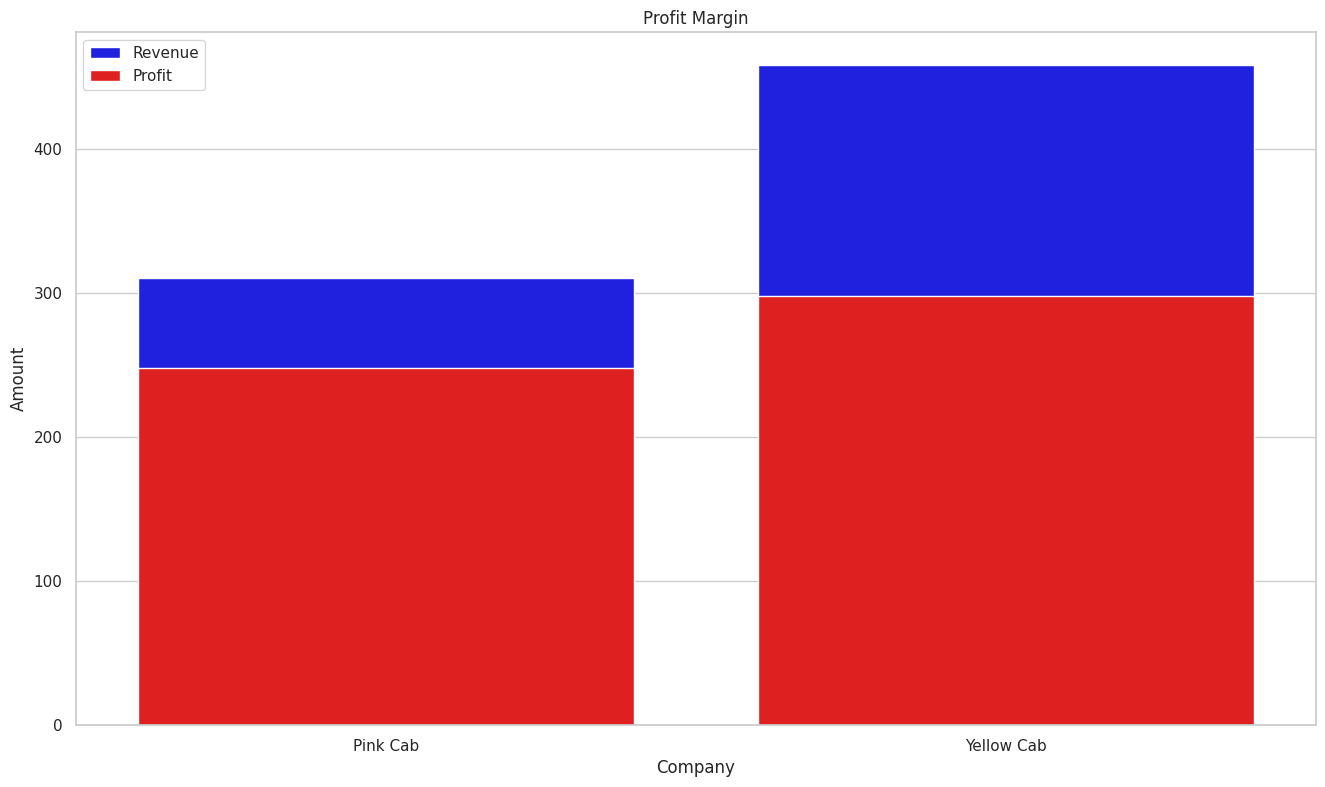

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by company and calculate mean price charged and cost of trip
company = df.groupby('Company').agg({'Price Charged': 'mean', 'Cost of Trip': 'mean'})

# Reset index to get company names as a column
company = company.reset_index()

# Set style
sns.set_style('whitegrid')

# Set figure size
plt.figure(figsize=(16,9))

# Create barplot for revenue
sns.barplot(x='Company', y='Price Charged', data=company, color='blue', label='Revenue')

# Create barplot for profit
sns.barplot(x='Company', y='Cost of Trip', data=company, color='red', label='Profit')

# Set title, x and y labels, and legend
plt.title('Profit Margin')
plt.xlabel('Company')
plt.ylabel('Amount')
plt.legend()

# Show plot
plt.show()


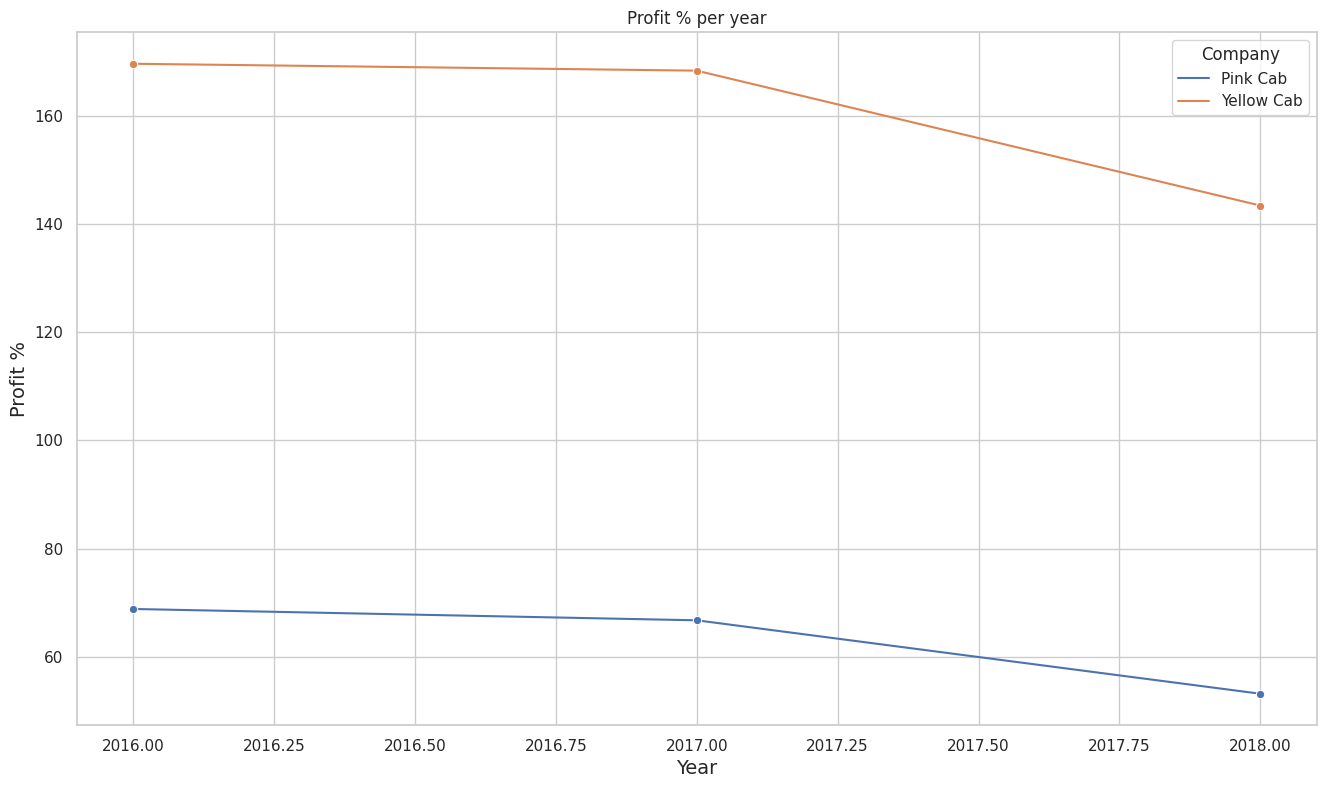

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# extract year from date of travel
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year

# calculate profit
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

# group by year and company, and calculate mean profit
profit_by_year = df.groupby(['Year', 'Company'])['Profit'].mean().reset_index()

# plot line chart
plt.figure(figsize=(16,9))
sns.lineplot(x='Year', y='Profit', hue='Company', data=profit_by_year, marker='o')
plt.xlabel('Year', size=14)
plt.ylabel('Profit %', size=14)
plt.title('Profit % per year')
plt.show()


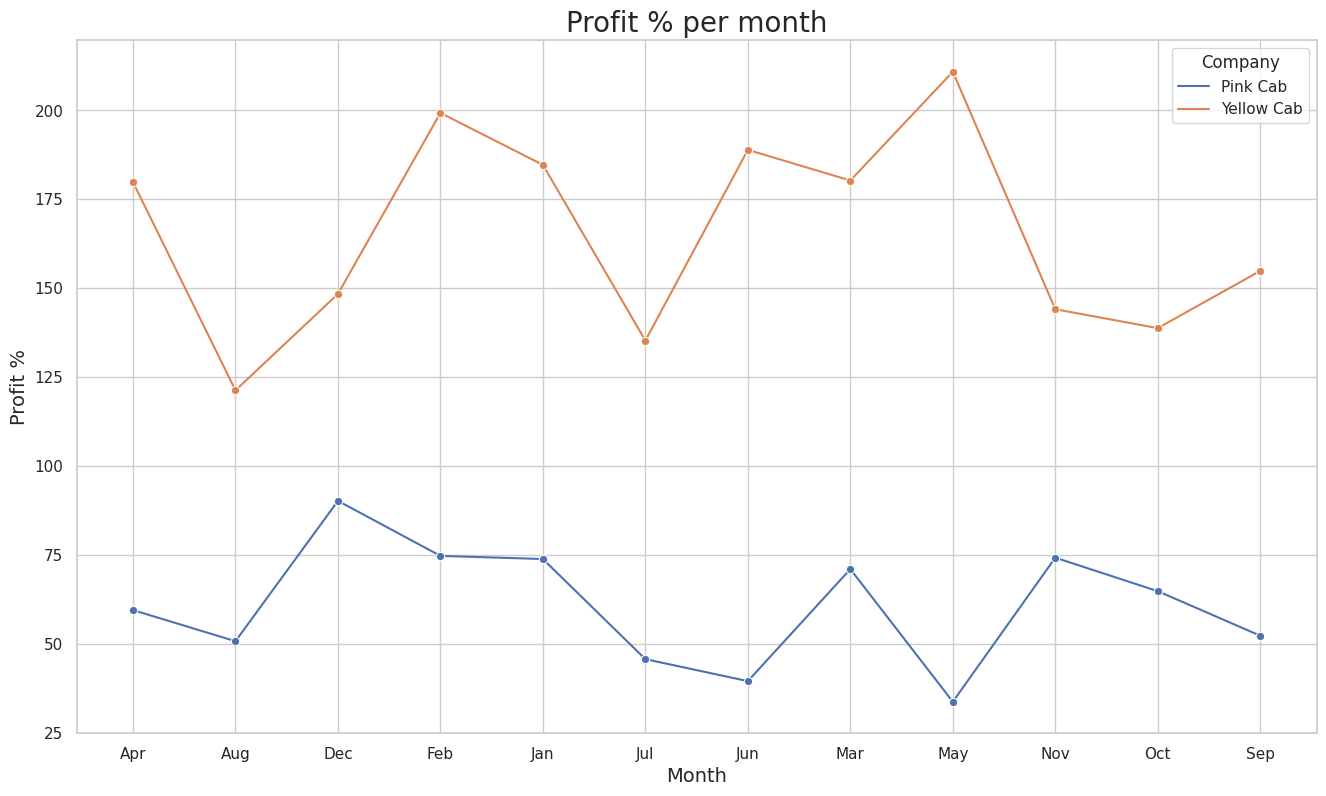

In [ ]:
import calendar

# Extract month name from date of travel
df['Month'] = df['Date of Travel'].dt.month.apply(lambda x: calendar.month_abbr[x])

# Group by month and company and calculate average profit
profit_by_month = df.groupby(['Month', 'Company'])['Profit'].mean().reset_index()

# Create lineplot
plt.figure(figsize=(16, 9))
sns.lineplot(data=profit_by_month, x='Month', y='Profit', hue='Company', marker='o')
plt.xlabel('Month', size=14)
plt.ylabel('Profit %', size=14)
plt.title('Profit % per month', size=20)
plt.show()


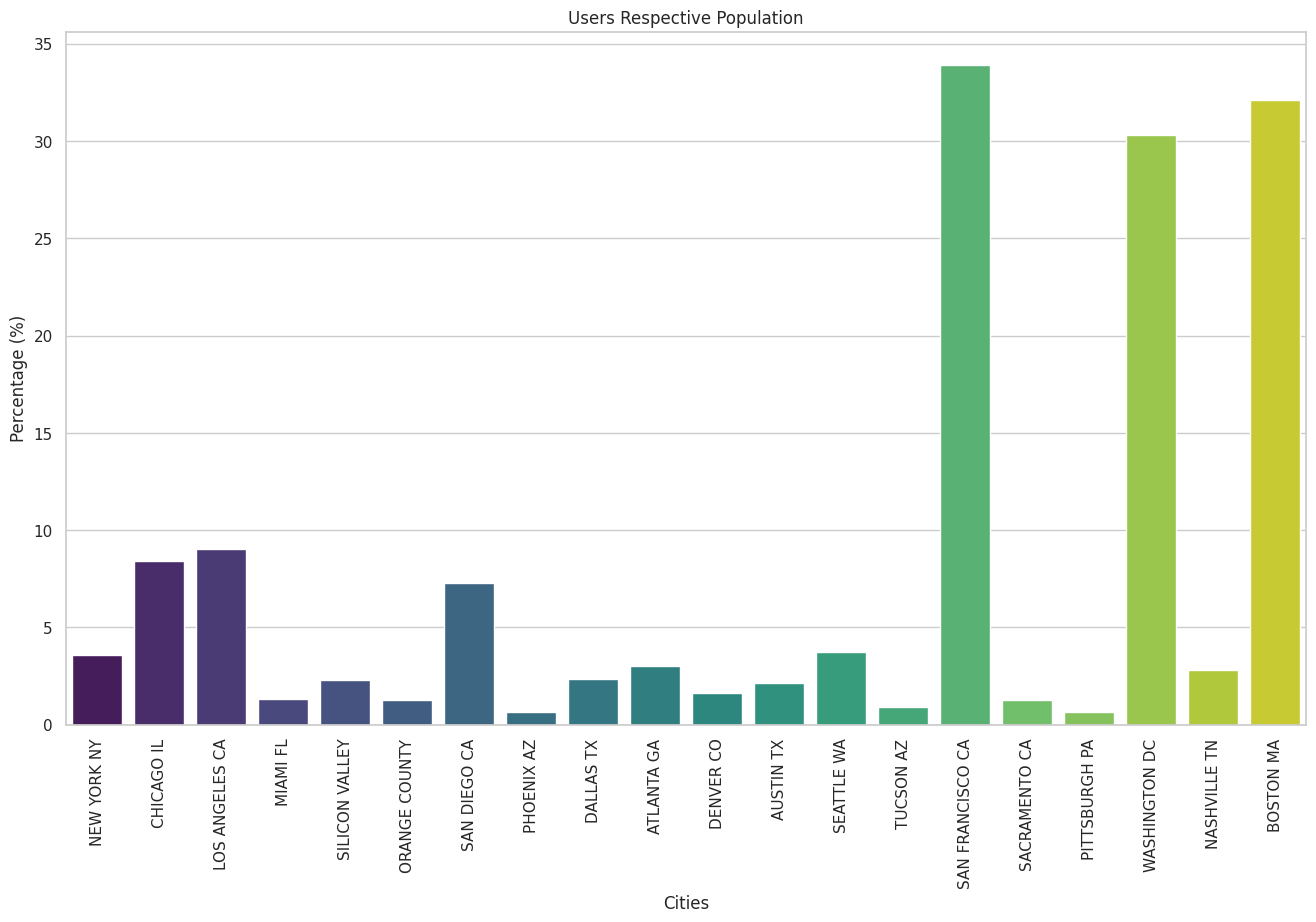

In [ ]:
urp = (city_df['Users'] /city_df['Population']) * 100 
city = city_df['City']

plt.figure(figsize=(16, 9))
sns.barplot(x=city, y=urp, palette="viridis")
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.xticks(rotation=90)
plt.show()


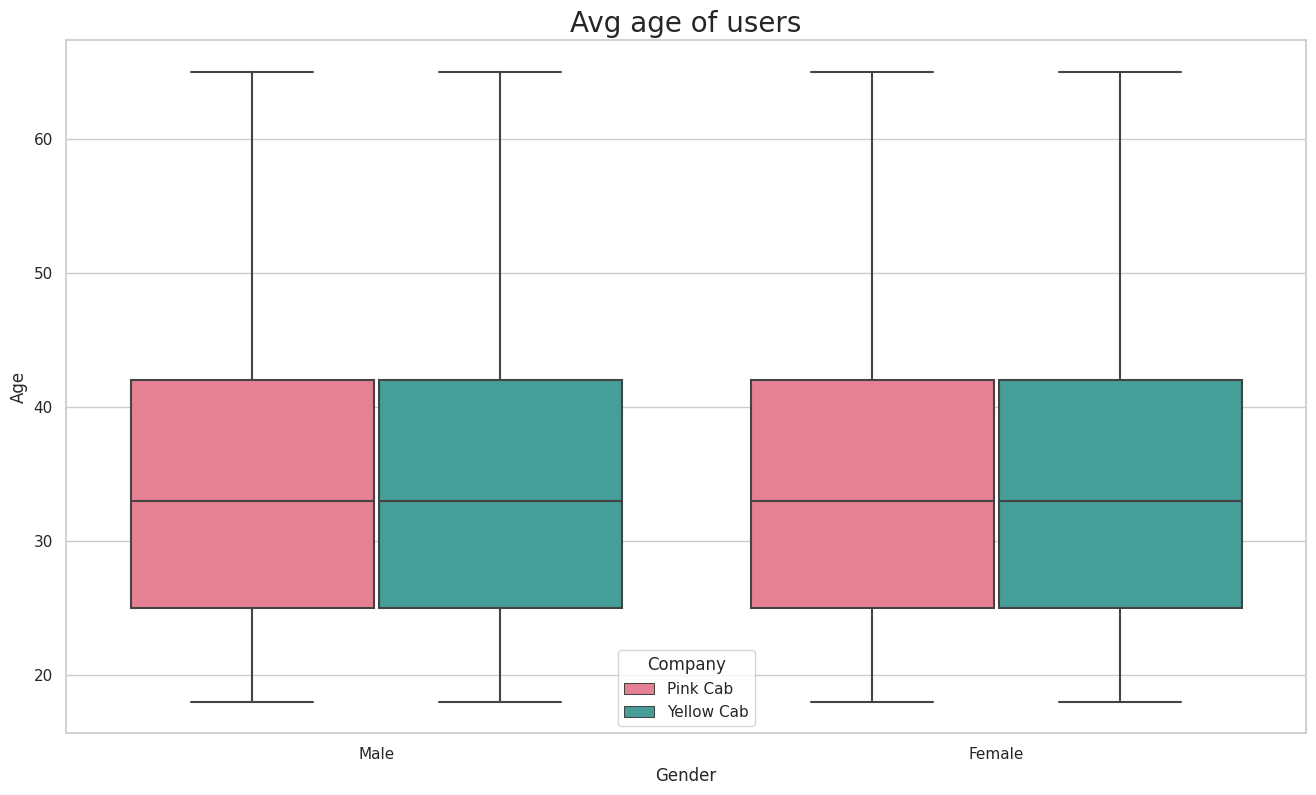

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.boxplot(x='Gender', y='Age', hue='Company', data=df, palette='husl')
plt.title('Avg age of users', fontsize=20)
plt.show()


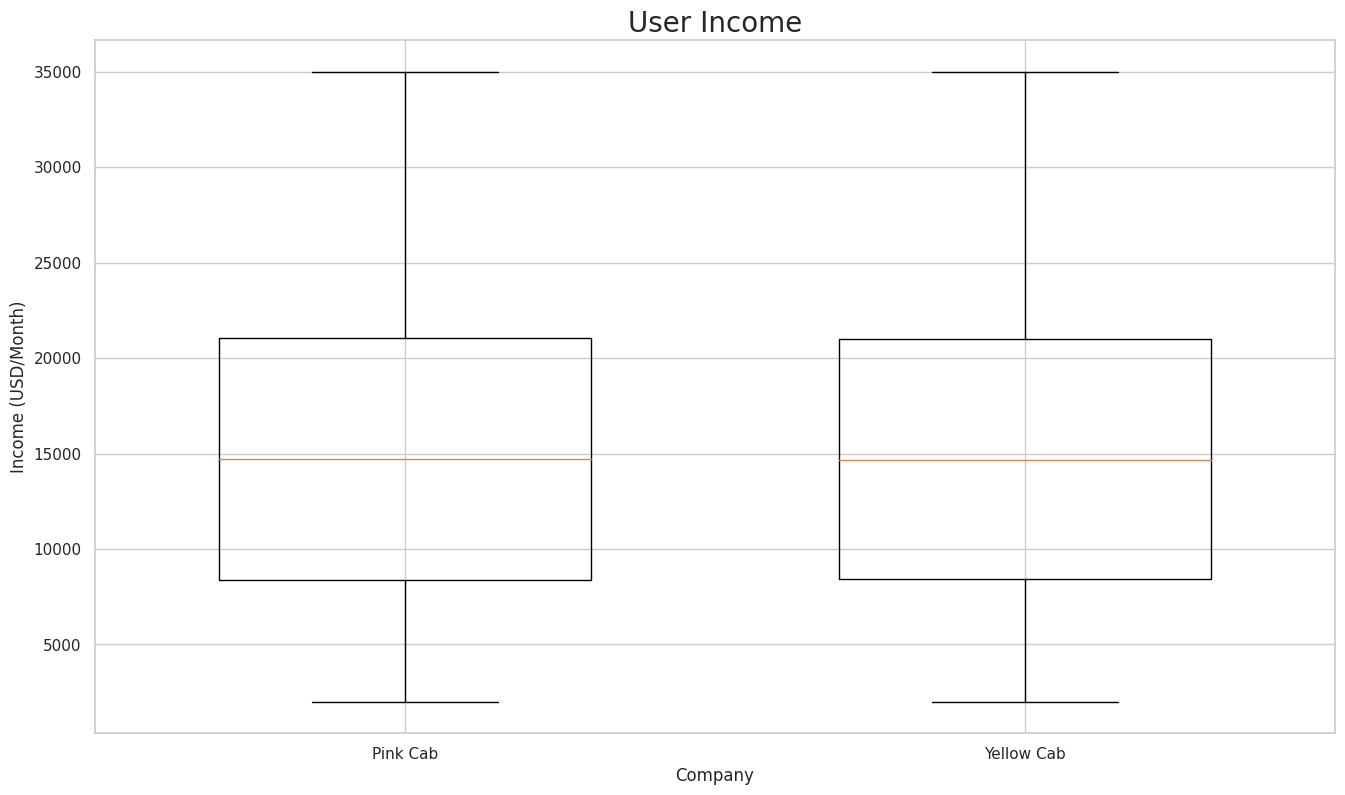

In [ ]:
plt.figure(figsize=(16, 9))

companies = df['Company'].unique()

for i, company in enumerate(companies):
    plt.boxplot(df[df['Company'] == company]['Income (USD/Month)'], positions=[i+1], widths=0.6, showfliers=False)

plt.xticks(range(1, len(companies)+1), companies)
plt.title('User Income', fontsize=20)
plt.xlabel('Company')
plt.ylabel('Income (USD/Month)')
plt.show()


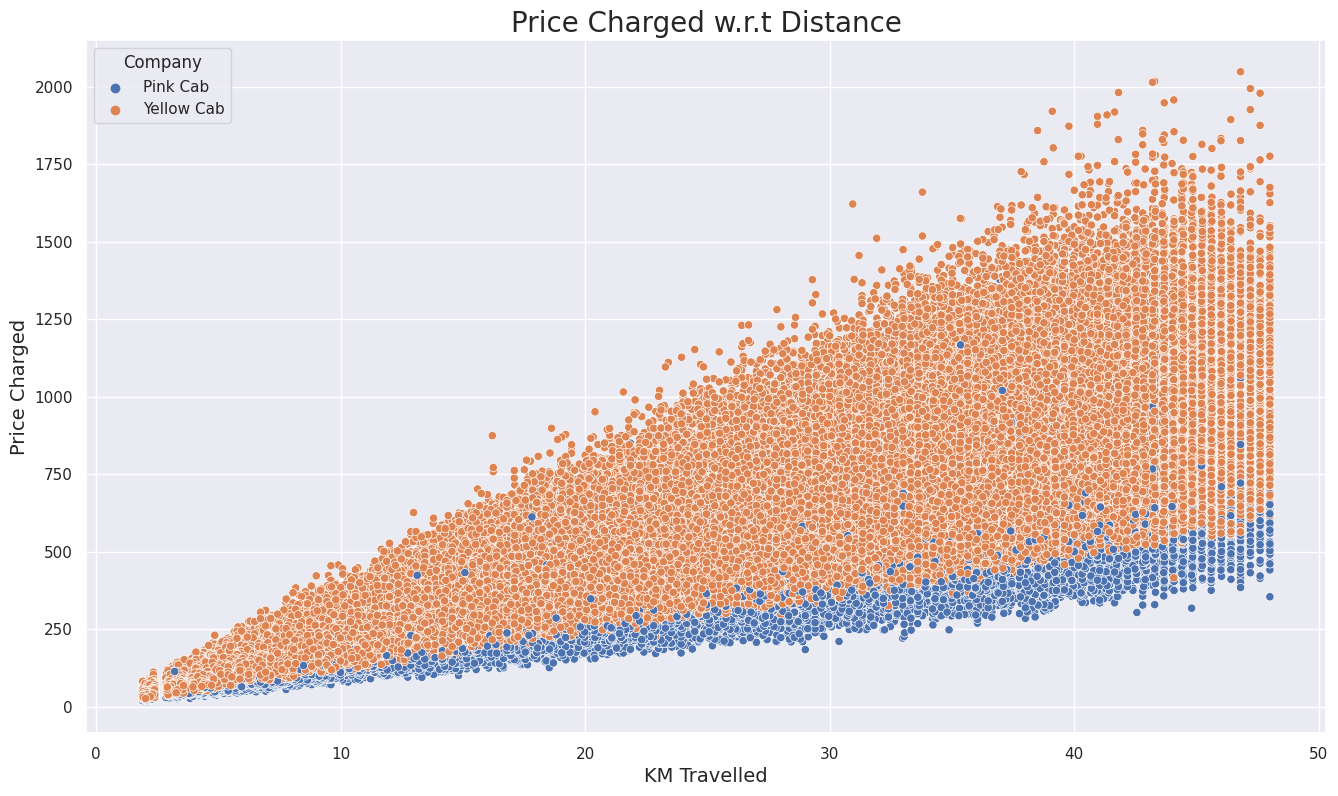

In [ ]:
sns.set(style='darkgrid')

plt.figure(figsize=(16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

pink_cab_male = df[(df.Company=='Pink Cab')&(df.Gender=='Male')]['Profit']
pink_cab_female = df[(df.Company=='Pink Cab')&(df.Gender=='Female')]['Profit']

t_stat, p_value = ttest_ind(pink_cab_male, pink_cab_female, equal_var=True)

print(f"Number of male Pink Cab customers: {len(pink_cab_male)}")
print(f"Number of female Pink Cab customers: {len(pink_cab_female)}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis (H0) that there is no difference in profit between male and female Pink Cab customers")
else:
    print("We fail to reject the null hypothesis (H0) that there is no difference in profit between male and female Pink Cab customers")


Number of male Pink Cab customers: 47231
Number of female Pink Cab customers: 37480
P-value: 0.11515305900425798
We fail to reject the null hypothesis (H0) that there is no difference in profit between male and female Pink Cab customers


In [ ]:
import scipy.stats as stats

males = df[(df.Gender == 'Male') & (df.Company == 'Yellow Cab')]['Profit']
females = df[(df.Gender == 'Female') & (df.Company == 'Yellow Cab')]['Profit']

_, p_value = stats.ttest_ind(males, females, equal_var=True)

print('P value is', p_value)

if p_value < 0.05:
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')


P value is 6.060473042494056e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


In [ ]:
import scipy.stats as stats

# extract profit for Pink Cab rides for people aged below 60 years
pinkcab_below60 = df[(df.Age < 60) & (df.Company == 'Pink Cab')]['Profit']

# extract profit for Pink Cab rides for people aged 60 years or above
pinkcab_above60 = df[(df.Age >= 60) & (df.Company == 'Pink Cab')]['Profit']

# perform two-sample t-test for independent samples
_, p_value = stats.ttest_ind(pinkcab_below60, pinkcab_above60, equal_var=True)

# print the p-value and hypothesis test result
if(p_value < 0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')


We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# filter the data based on the given conditions
males = df[(df.Age <= 60) & (df.Company == 'Yellow Cab') & (df.Gender == 'Male')]['Profit']
females = df[(df.Age <= 60) & (df.Company == 'Yellow Cab') & (df.Gender == 'Female')]['Profit']

# perform the t-test
_, p_value = stats.ttest_ind(males, females, equal_var=True)

# interpret the results
if p_value < 0.05:
    print('We accept the alternative hypothesis (H1) that there is a difference regarding age and gender for Yellow Cab')
else:
    print('We accept the null hypothesis (H0) that there is no difference regarding age and gender for Yellow Cab')


We accept the alternative hypothesis (H1) that there is a difference regarding age and gender for Yellow Cab


In [ ]:
cash_profits = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
card_profits = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793286
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [ ]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')


P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab
